# HOTEL RECOMMENDATION SYSTEM

# Submitted by:-
Moniha Rangaraju Radhamani - V00971194,
Anjani Sharma - V00972813,
Hanxio Chen - V00957823


# Importing and installing required libraries

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install twython

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Setting seed
import numpy as np
np.random.seed(1777)

In [5]:
# Importing the standard libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('stopwords')
nltk.download('vader_lexicon')
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('punkt')
from nltk import punkt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as linear
from sklearn import metrics
import pickle
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xg
from sklearn import linear_model
from tkinter import*
from tkinter import ttk

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Loading the Data

In [6]:
# Importing the data
Europe_hotel = open('Hotel_Reviews.csv')
input_df = pd.read_csv(Europe_hotel)
pd.set_option('display.max_columns', None)
input_df.head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968


# Exploratory Data Analysis

In [7]:
# Summary about the columns of the input data
input_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [8]:
# Maximum and Minimum Score a particular hotel achieved
input_df.groupby(["Hotel_Name"]).Reviewer_Score.agg([max,min])  

,max,min
Hotel_Name,,
11 Cadogan Gardens,10.0,4.2
1K Hotel,10.0,3.8
25hours Hotel beim MuseumsQuartier,10.0,2.5
41,10.0,6.7
45 Park Lane Dorchester Collection,10.0,8.3
...,...,...
citizenM London Bankside,10.0,2.9
citizenM London Shoreditch,10.0,2.5
citizenM Tower of London,10.0,3.0


In [9]:
# Number of reviews rows in the dataset for each hotel
input_df.Hotel_Name.value_counts()     

Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3578
DoubleTree by Hilton Hotel London Tower of London    3212
                                                     ... 
Hotel Eitlj rg                                         12
Hotel Daniel Paris                                     12
Mercure Paris Porte d Orleans                          10
Hotel Wagner                                           10
Hotel Gallitzinberg                                     8
Name: Hotel_Name, Length: 1492, dtype: int64

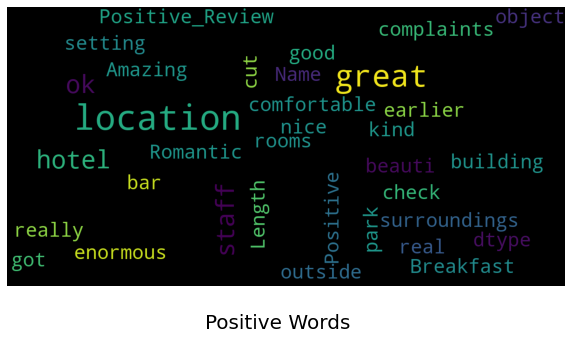

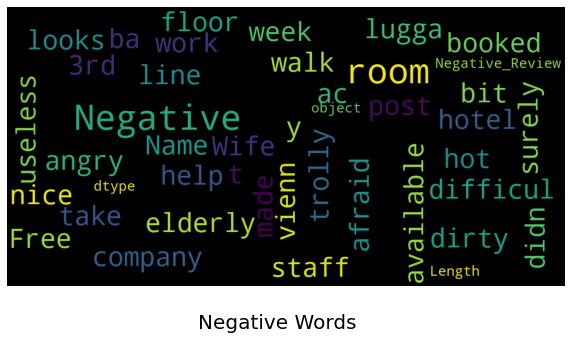

In [10]:
# Creating a word cloud to view the maximum repeated word in both positive and negative reviews

def show_wordcloud(data, title = None):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud( background_color = 'black',max_words = 200,max_font_size = 25,scale=3,random_state = 30,stopwords=stopwords).generate(str(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize =20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(input_df["Positive_Review"],'Positive Words')
show_wordcloud(input_df["Negative_Review"],'Negative Words')

In [11]:
# shows us the top hotel names by their review scores
BestHotels = (input_df.groupby('Hotel_Name')['Reviewer_Score'].sum()/input_df
              .groupby('Hotel_Name')['Reviewer_Score'].count()).sort_values(ascending=False).head(10)
BestHotels            

Hotel_Name
Ritz Paris                             9.725000
Hotel Casa Camper                      9.718937
41                                     9.711650
H tel de La Tamise Esprit de France    9.688525
Le Narcisse Blanc Spa                  9.671930
H10 Casa Mimosa 4 Sup                  9.660345
Hotel Eiffel Blomet                    9.646667
Hotel The Serras                       9.623474
45 Park Lane Dorchester Collection     9.603571
The Soho Hotel                         9.597452
Name: Reviewer_Score, dtype: float64

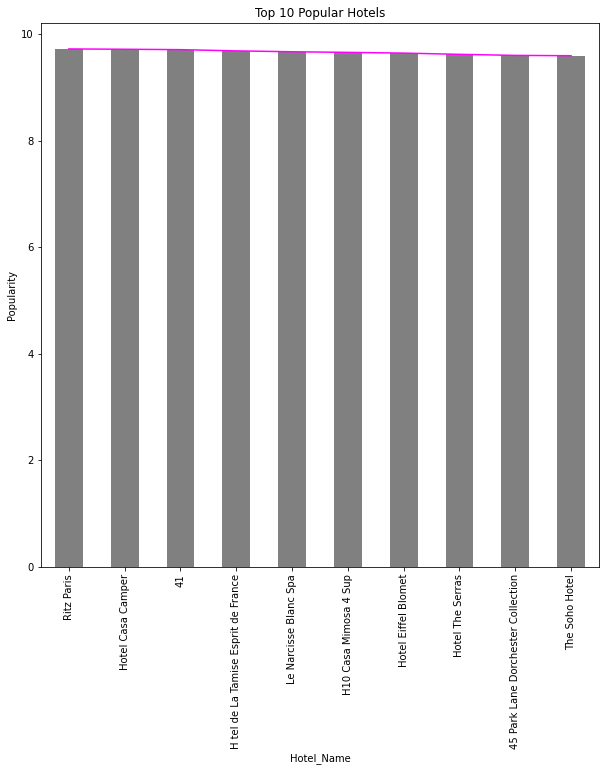

In [12]:
# Plots the top 10 popular hotels
s = pd.Series([1,2,3], index=['a','b','c'])
s.plot.bar(figsize=(10,10))
plt.xlabel('Hotel')
plt.ylabel('Popularity')
BestHotels.plot(kind = 'line',color='magenta')
plt.title('Top 10 Popular Hotels')
BestHotels.plot(kind = 'bar',color='gray')
plt.show()

In [13]:
BestHotels={'Ritz Paris','Hotel Casa Camper','41','H tel de La Tamise Esprit de France','Le Narcisse Blanc Spa','H10 Casa Mimosa 4 Sup','Hotel Eiffel Blomet','Hotel The Serras','45 Park Lane Dorchester Collection','The Soho Hotel'}

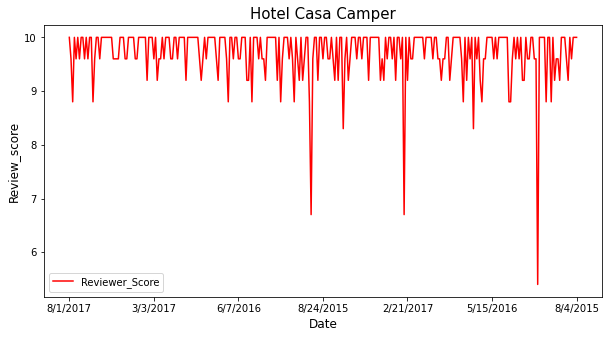

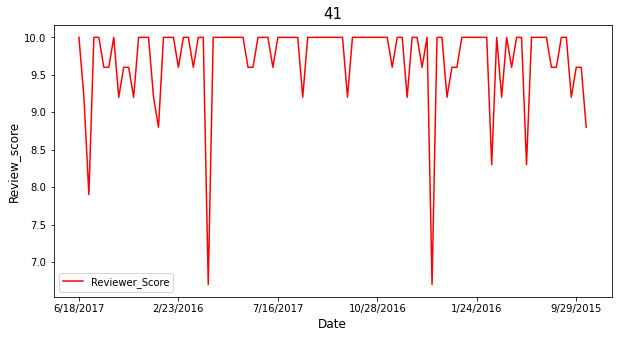

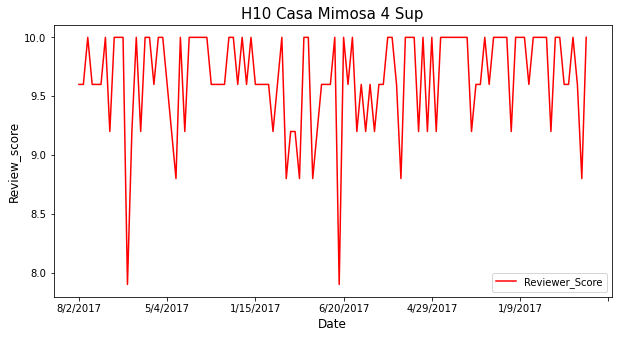

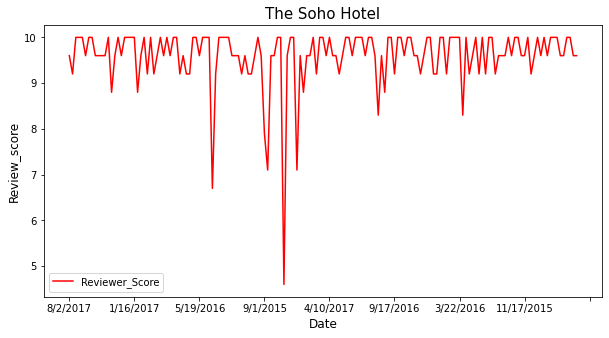

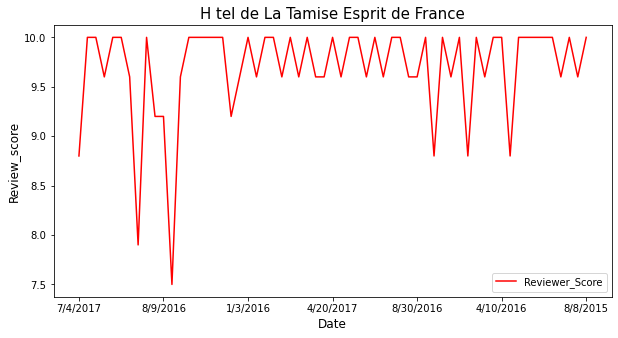

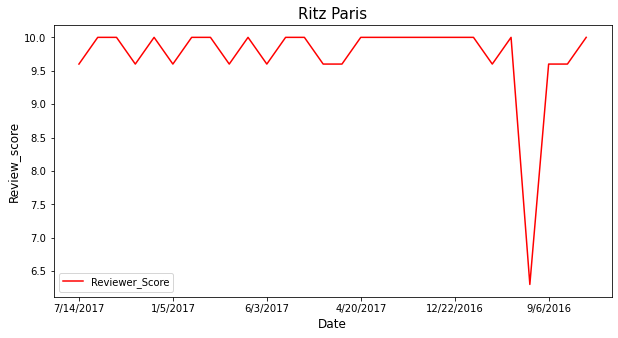

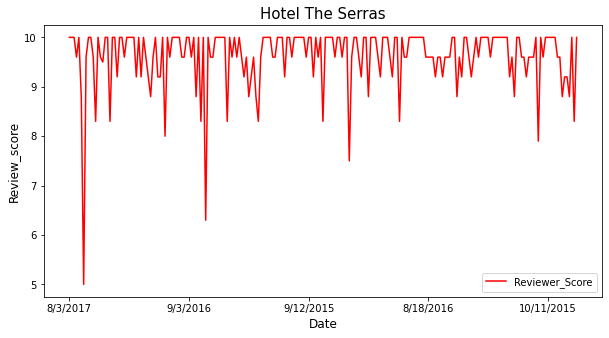

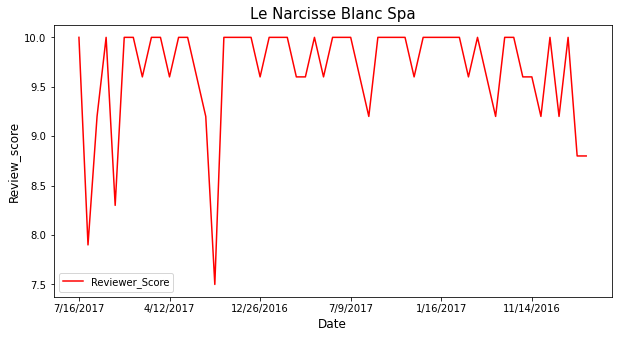

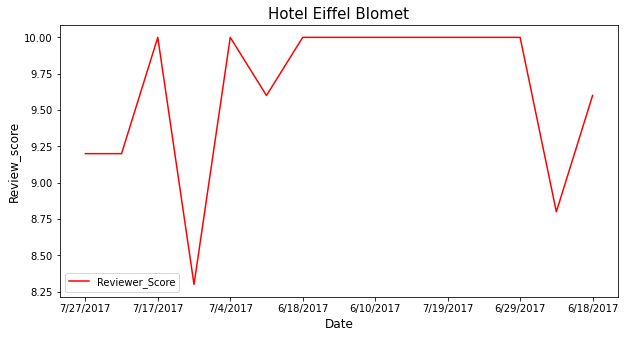

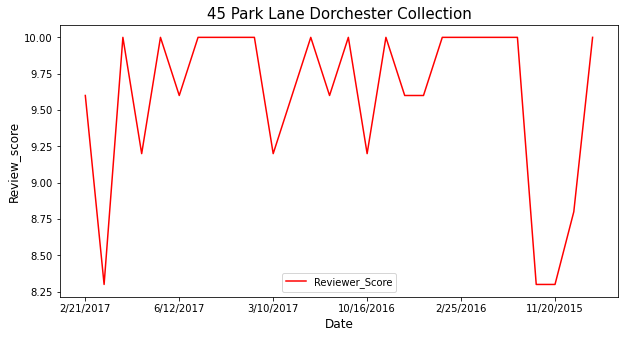

In [14]:
# Review scores of the top 10 hotels depending on the time
for i in BestHotels:
    Hotel1 = input_df[input_df.Hotel_Name == i]
    Hotel1.plot('Review_Date', 'Reviewer_Score',figsize=(10,5),color='red')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Review_score', fontsize=12)
    title_str = i
    plt.title(title_str, fontsize=15)
    plt.show()

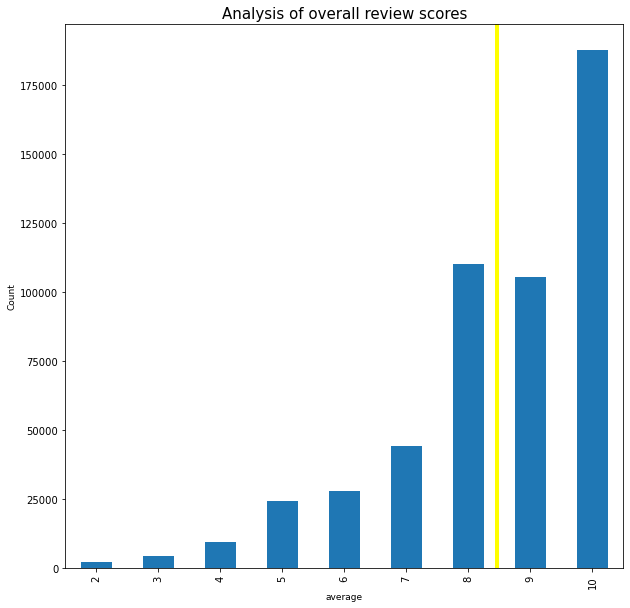

In [15]:
# Analysis of overall review scores

# rounding off the values for ease and creating a new column with those values
input_df["Rounded_ReviewScore"] = input_df["Reviewer_Score"].apply(lambda x: int(round(x))) 

# accessing number of reviews with scores
reviews_dist = input_df["Rounded_ReviewScore"].value_counts().sort_index()
bar = reviews_dist.plot.bar(figsize =(10,10))
plt.title("Analysis of overall review scores", fontsize = 15)
# red line is depicting the average score of all reviews
plt.axvline(input_df["Rounded_ReviewScore"].mean()-2, 0 ,1, color = "yellow", lw = 4)  
plt.xlabel("average", fontsize = 9)
plt.ylabel("Count", fontsize = 9)
bar.tick_params(labelsize=10)

# Remove the column "Reviewer_Score_Round"
input_df.drop("Rounded_ReviewScore", axis = 1, inplace = True)

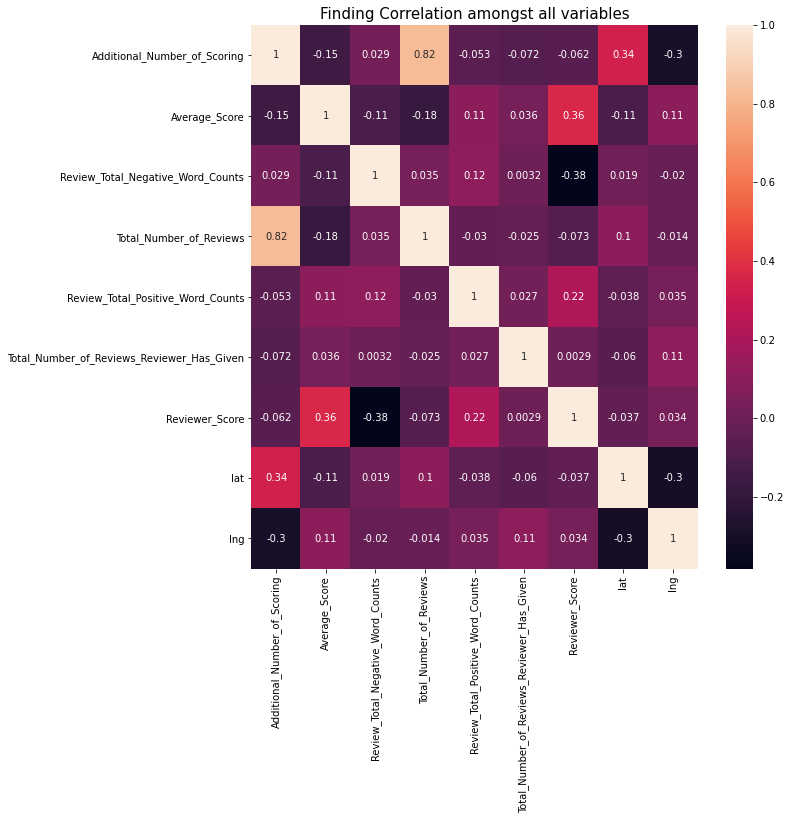

In [16]:
# Finding Correlation amongst all variables

find_corr = input_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(find_corr, annot = True)
plt.title("Finding Correlation amongst all variables", fontsize = 15)
plt.show()

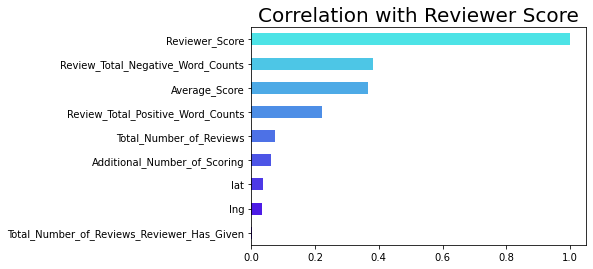

In [17]:
# Correlation with Reviewer Score
# deciding the color scheme
colors = []                        
dim = find_corr.shape[0]
for i in range(dim):
    r = i * 1/dim
    colors.append((0.3,r,0.9))

# Applying absolute on values to keep them positive
find_corr["Reviewer_Score"].apply(lambda x: abs(x)).sort_values().plot.barh(color = colors) 

plt.title("Correlation with Reviewer Score", fontsize = 20)   
plt.show()

<AxesSubplot:xlabel='Review_Total_Negative_Word_Counts', ylabel='Review_Total_Positive_Word_Counts'>

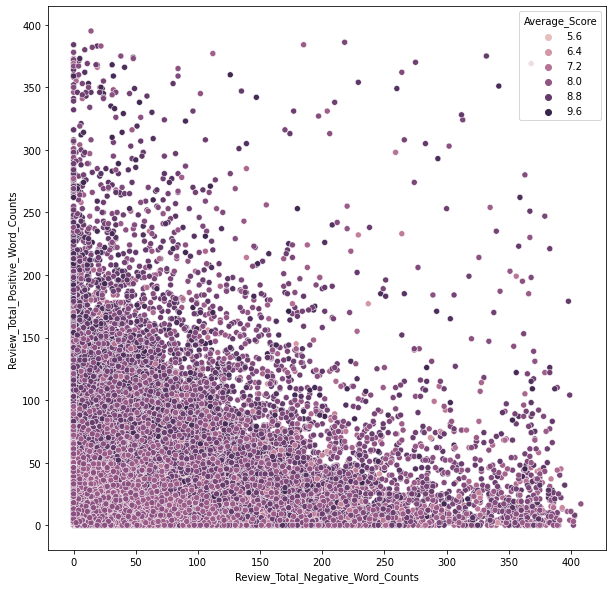

In [18]:
# Scatter plot between positive and negative review word count

plt.figure(figsize=(10,10))
sns.scatterplot(x=input_df['Review_Total_Negative_Word_Counts'], 
                y=input_df['Review_Total_Positive_Word_Counts'],hue=input_df['Average_Score'])

# Feature Engineering

In [19]:
# Dropping the NaN values, if anything present
dropna_df = input_df.dropna()

In [20]:
# Removing the unnecessary columns
col_removed_df = dropna_df.copy()
col_removed_df.drop(labels=['Additional_Number_of_Scoring','Review_Date','Reviewer_Nationality',
       'Total_Number_of_Reviews', 'Total_Number_of_Reviews_Reviewer_Has_Given', 
       'days_since_review', 'lat', 'lng'], axis = 1,inplace=True)

# Viewing the data after removing unnecessary columns
col_removed_df.head(3)

,Hotel_Address,Average_Score,Hotel_Name,Negative_Review,Review_Total_Negative_Word_Counts,Positive_Review,Review_Total_Positive_Word_Counts,Reviewer_Score,Tags
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,I am so angry that i made this post available...,397,Only the park outside of the hotel was beauti...,11,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,No Negative,0,No real complaints the hotel was great great ...,105,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,Rooms are nice but for elderly a bit difficul...,42,Location was good and staff were ok It is cut...,21,7.1,"[' Leisure trip ', ' Family with young childre..."


In [21]:
# Replacing the Country name 'United Kingdom' as UK to make coding easy
col_added_df = col_removed_df.copy()
col_added_df['Hotel_Address'] = col_added_df['Hotel_Address'].str.replace('United Kingdom','UK')

# Adding a new column 'Country'
col_added_df['Country'] = col_added_df['Hotel_Address'].apply(lambda x: x.split(' ')[-1])

# Knowing the unique countries of the given dataset
print('Array of unique countries:')
np.unique(col_added_df['Country'])

Array of unique countries:


array(['Austria', 'France', 'Italy', 'Netherlands', 'Spain', 'UK'],
      dtype=object)

In [22]:
col_added_df.reset_index(drop=True, inplace=True)

# Adding new column for cities
country_uk=col_added_df.where(col_added_df['Country'] == 'UK')
uk = country_uk[country_uk['Hotel_Address'].notnull()]
country_not_uk = col_added_df.where(col_added_df['Country'] != 'UK')
not_uk = country_not_uk[country_not_uk['Hotel_Address'].notnull()]
uk['City'] = uk['Hotel_Address'].apply(lambda x: x.split(' ')[-4])
not_uk['City'] = not_uk['Hotel_Address'].apply(lambda x: x.split(' ')[-2])
col_added_df = pd.concat([uk,not_uk])

# Finding the unique cities the given dataset
print('Array of unique cities:')
np.unique(col_added_df['City'])

Array of unique cities:


array(['Amsterdam', 'Barcelona', 'London', 'Milan', 'Paris', 'Vienna'],
      dtype=object)

In [23]:
# Viewing the total number of unique hotels
unique_hotels = np.unique(col_added_df['Hotel_Name'])
print('The total number of UNIQUE HOTELS are', len(unique_hotels))

The total number of UNIQUE HOTELS are 1475


In [24]:
# Viewing the dataset with the added columns
col_added_df.head(3)

,Hotel_Address,Average_Score,Hotel_Name,Negative_Review,Review_Total_Negative_Word_Counts,Positive_Review,Review_Total_Positive_Word_Counts,Reviewer_Score,Tags,Country,City
405,1 15 Templeton Place Earl s Court Kensington a...,8.5,K K Hotel George,Really nothing negative to say about this hotel,9.0,Very comfortable beds smart bathroom good sho...,18.0,9.6,"[' Leisure trip ', ' Group ', ' Classic Twin R...",UK,London
406,1 15 Templeton Place Earl s Court Kensington a...,8.5,K K Hotel George,No coffee or tea in the room or lobby No one ...,52.0,No Positive,0.0,7.1,"[' Leisure trip ', ' Couple ', ' Classic Twin ...",UK,London
407,1 15 Templeton Place Earl s Court Kensington a...,8.5,K K Hotel George,Room was pretty small for the three of us,11.0,The staff was very friendly and helpful in or...,27.0,9.2,"[' Leisure trip ', ' Family with young childre...",UK,London


In [ ]:
# Cleaning the words of the features 'Negative_Review' and 'Positive_Review'
clean_df = col_added_df.copy()

# Converting all the words to lower case
clean_df['Positive_Review'] = clean_df['Positive_Review'].str.lower().str.strip()
clean_df['Negative_Review'] = clean_df['Negative_Review'].str.lower().str.strip()

# Removing the punctuations and unnecessary symbols
clean_df['Positive_Review'] = clean_df['Positive_Review'].apply(lambda x: re.sub(r"[^a-zA-Z0-9]"," ",str(x)))
clean_df['Negative_Review'] = clean_df['Negative_Review'].apply(lambda x: re.sub(r"[^a-zA-Z0-9]"," ",str(x)))

# Removing empty tokens
clean_df['Positive_Review'] = clean_df['Positive_Review'].apply(lambda x: "".join([t for t in x if len(t) > 0]))
clean_df['Negative_Review'] = clean_df['Negative_Review'].apply(lambda x: "".join([t for t in x if len(t) > 0]))

# Defining stop words
stop_words = set(stopwords.words('english'))

# Defining function to remove stop words
def remove_stop(sentence):
  clean_text = list()
  sen = sentence.split(" ")
  for text in sen:
    if text not in stop_words:
      clean_text.append(text)
  clean_text =  " ".join(text for text in clean_text)
  return clean_text

# Removing stop words
clean_df['Positive_Review'] = clean_df['Positive_Review'].apply(lambda x: remove_stop(x))
clean_df['Negative_Review'] = clean_df['Negative_Review'].apply(lambda x: remove_stop(x))

In [ ]:
# Creating Score column for Positive and Negative Reviews
final_clean_df = clean_df.copy()
pos_compound = []
neg_compund = []
sentiment_analyzer = SentimentIntensityAnalyzer() 
final_clean_df['Positive_Score'] = final_clean_df["Positive_Review"].apply(lambda x: sentiment_analyzer.polarity_scores(x)['pos'])
final_clean_df['Negative_Score'] = final_clean_df["Negative_Review"].apply(lambda x: sentiment_analyzer.polarity_scores(x)['neg'])
pos_compound = final_clean_df["Positive_Review"].apply(lambda x: sentiment_analyzer.polarity_scores(x)['compound'])
neg_compound = final_clean_df["Negative_Review"].apply(lambda x: sentiment_analyzer.polarity_scores(x)['compound'])
final_clean_df['Sentiment_Score'] =  [sum(i) for i in zip(pos_compound, neg_compound )]  
final_clean_df.head(3)

<AxesSubplot:title={'center':"Correlation of features with 'Sentiment_Score' "}>

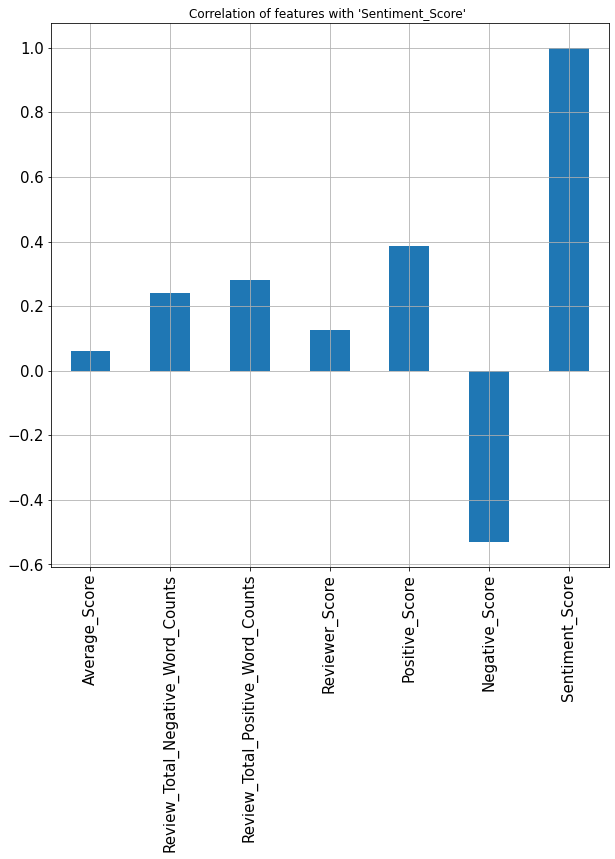

In [27]:
# Finding the correlated features with the 'Sentiment_Score'
# This is done to find the features to build ML model
final_clean_df.corrwith(final_clean_df['Sentiment_Score']).plot.bar(figsize=(10,10),
                            grid=True,title="Correlation of features with 'Sentiment_Score' ",fontsize=15)

# **Machine Learning Models**

In [28]:
# Test-train split

train_x, test_x, train_y, test_y = train_test_split(final_clean_df, final_clean_df[['Sentiment_Score']], test_size=0.33, 
                                                    random_state=0,stratify = final_clean_df['Hotel_Name'])


In [29]:
# Defining the input train features for the ML model
model_input_test = test_x[['Average_Score','Review_Total_Negative_Word_Counts','Review_Total_Positive_Word_Counts',
                           'Positive_Score','Negative_Score','Reviewer_Score']]
model_input_train = train_x[['Average_Score','Review_Total_Negative_Word_Counts','Review_Total_Positive_Word_Counts',
                             'Positive_Score','Negative_Score','Reviewer_Score']]
model_input_test.head(3)

,Average_Score,Review_Total_Negative_Word_Counts,Review_Total_Positive_Word_Counts,Positive_Score,Negative_Score,Reviewer_Score
151077,9.1,53.0,49.0,0.433,0.0,9.2
324148,9.4,0.0,38.0,0.648,1.0,10.0
465099,8.3,0.0,6.0,0.785,1.0,8.3


In [30]:
# Defining the output label vector for the ML model
model_label_test = test_y
model_label_train = train_y
model_label_train.head(3)

,Sentiment_Score
473177,0.4076
364898,1.5470
452080,-0.5719


In [31]:
# Standardize the input data

scaled_input_train = StandardScaler().fit_transform(model_input_train)
scaled_input_test = StandardScaler().fit_transform(model_input_test)

In [32]:
# Function to plot the mean square error 
def mse_plot(expectation,prediction,model_type):
  expectation = expectation.set_index(np.arange(len(expectation)))
  error_value = list()
  for value in range(len(expectation)):
    error = (expectation.loc[value,'Sentiment_Score'] - prediction[value])**2 
    error_value.append(np.sqrt(error))
  plt.plot(error_value)
  plt.xlabel('Test data instance')
  plt.ylabel('Root Mean Square Error')
  plt.title('RMSE plot for {}'.format(model_type))
  plt.show()

# **Linear Regression**

In [33]:
# Creating a linear regression model

linear_reg_model = linear().fit(scaled_input_train,model_label_train)
linear_test_prediction = linear_reg_model.predict(scaled_input_test)

print("RMSE of Linear Regression =",np.sqrt(metrics.mean_squared_error(model_label_test,linear_test_prediction)))

RMSE of Linear Regression = 0.3372099696237485


In [34]:
# Saving the created decision tree model

pickle.dump(linear_reg_model,open('linear_regression_model.pkl','wb'))

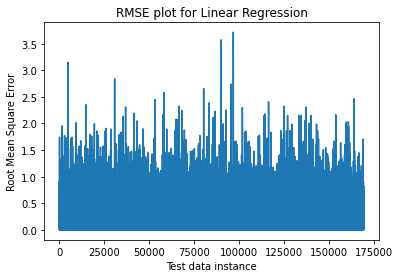

In [35]:
mse_plot(model_label_test,linear_test_prediction,'Linear Regression')

# **Decision Tree Regressor**

In [36]:
# Creating a Decision tree regressor model

dt_model = DecisionTreeRegressor().fit(scaled_input_train,model_label_train)
dt_test_prediction = dt_model.predict(scaled_input_test)

print("RMSE of Decision Tree Regressor = ",np.sqrt(metrics.mean_squared_error(model_label_test,dt_test_prediction)))

RMSE of Decision Tree Regressor =  0.33255918306751986


In [37]:
# Saving the created decision tree model

pickle.dump(dt_model,open('dt_model.pkl','wb'))

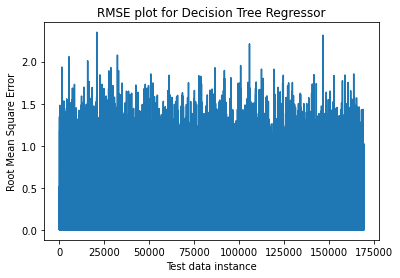

In [38]:
mse_plot(model_label_test,dt_test_prediction,'Decision Tree Regressor')

# **Random Forest Regressor**

In [39]:
# Creating a random forest regression with 500 trees

rf_model = RandomForestRegressor(n_estimators=500).fit(scaled_input_train,model_label_train)
rf_test_prediction = rf_model.predict(scaled_input_test)

print("RMSE of Random Forest Regressor =",np.sqrt(metrics.mean_squared_error(model_label_test,rf_test_prediction)))

RMSE of Random Forest Regressor = 0.24281067399614165


In [40]:
# Saving the created random forest model

pickle.dump(rf_model,open('rf_model.pkl','wb'))

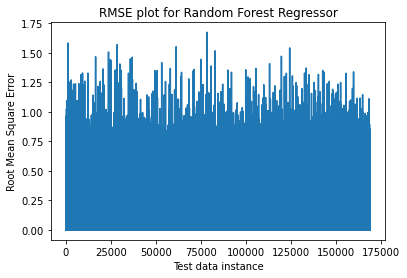

In [41]:
mse_plot(model_label_test,rf_test_prediction,'Random Forest Regressor')

# **Gradient Boost Regressor**

In [42]:
# Creating a Gradient boost regression model with 500 trees

gb_model = GradientBoostingRegressor(n_estimators=500).fit(scaled_input_train,model_label_train)
gb_test_prediction = gb_model.predict(scaled_input_test)

print("RMSE of Gradient Boost Regressor = ",np.sqrt(metrics.mean_squared_error(model_label_test,gb_test_prediction)))

RMSE of Gradient Boost Regressor =  0.23392127703240487


In [43]:
# Saving the created Gradient boost model

pickle.dump(gb_model,open('gb_model.pkl','wb'))

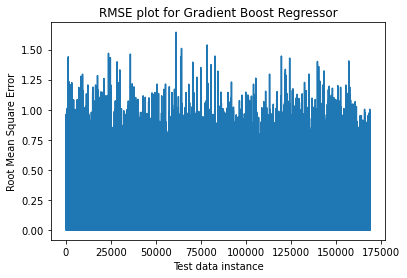

In [44]:
mse_plot(model_label_test,gb_test_prediction,'Gradient Boost Regressor')

# **XG Boost Regressor**

In [45]:
# Creating the xg boost regression with 500 trees

xg_model = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 500, seed = 100).fit(scaled_input_train,model_label_train)
xg_test_prediction = xg_model.predict(scaled_input_test)

print("RMSE of XG Boost Regressor = ",np.sqrt(metrics.mean_squared_error(model_label_test,xg_test_prediction)))

[19:33:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
RMSE of XG Boost Regressor =  0.2356357176370711


In [46]:
# Saving the created xg boost model

pickle.dump(xg_model,open('xg_model.pkl','wb'))

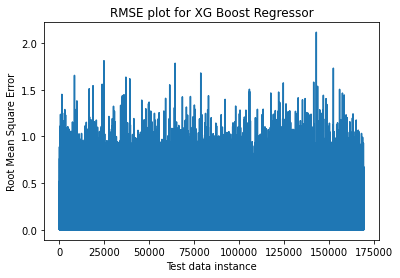

In [47]:
mse_plot(model_label_test,xg_test_prediction,'XG Boost Regressor')

# **Lasso Regression**

In [48]:
# Creating a lasso regression with alpha = 0.01

lasso_model = linear_model.Lasso(alpha=0.01).fit(scaled_input_train,model_label_train)
lasso_test_prediction = lasso_model.predict(scaled_input_test)

print("RMSE of Lasso Regression = ",np.sqrt(metrics.mean_squared_error(model_label_test,lasso_test_prediction)))

RMSE of Lasso Regression =  0.3380340615372987


In [49]:
# Saving the created lasso model

pickle.dump(lasso_model,open('lasso_model.pkl','wb'))

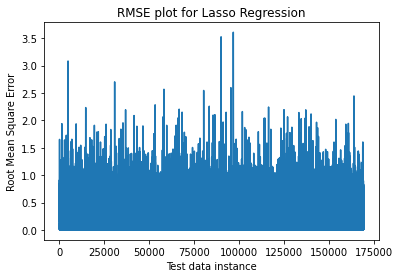

In [50]:
mse_plot(model_label_test,lasso_test_prediction,'Lasso Regression')

In [51]:
# Adding the prediction of the best model to the test set
test_x['Prediction'] = gb_test_prediction

# **Functions to filter hotels as per requirement**

In [52]:
# Function to filter hotel as per country and city
def filter_hotel(country,city):
    try:
        filtered_df = test_x.iloc[np.where((test_x["Country"] == country) & (test_x['City'] == city))]
        sorted_df=filtered_df.sort_values(by = 'Prediction',ascending=False)
    except:
        result = 'The selected city is not present inside the selected country'
        return result
    if len(sorted_df) == 0:
        result = 'There are no hotels available for the given filter'
        return result
    else:
        filtered_df = test_x.iloc[np.where((test_x["Country"] == country) & (test_x['City'] == city))]
        sorted_df=filtered_df.sort_values(by = 'Prediction',ascending=False)
        return sorted_df

In [53]:
# Function to fetch hotel as per requirement
def recommender(requirement,sorted_df):
  requirement = requirement.lower()
  requirement = re.sub(r"[^a-zA-Z0-9]"," ",str(requirement))
  requirement = requirement.split(" ")
  require_filtered = {word for word in requirement if not word in stop_words}
  require_lemm = set()
  for word in require_filtered:
    require_lemm.add(WordNetLemmatizer().lemmatize(word))
  cosine_score = list()
  required_df = sorted_df.copy()
  required_df = required_df.set_index(np.arange(len(required_df)))
  for row in range(0,len(required_df)):
    tags = required_df['Tags'][row].lower()
    tags = re.sub(r"[^a-zA-Z0-9]"," ",str(tags))
    tags = word_tokenize(tags)
    tags_filtered = {word for word in tags if not word in stop_words}
    tags_lemm = set()
    for word in tags_filtered:
      tags_lemm.add(WordNetLemmatizer().lemmatize(word))
    word_intersection = tags_lemm.intersection(require_lemm)
    cosine_score.append(len(word_intersection))
  required_df['Tags_score'] = cosine_score
  required_df.drop_duplicates(subset = ['Hotel_Name'])
  try:
    required_df.sort_values(required_df['Tags_score'],ascending = False)
  except:
    required_df
  return required_df['Hotel_Name']

# **User Interface**

In [ ]:
# Defining the basic window
window = Tk()
window.title("Hotel Recommendation System")
window.geometry('1350x900')

# Display heading
heading = Label(window, text = "HOTEL RECOMMENDATION SYSTEM", height = 3, width = 40,
                font = ("Bookman Old Style",20,'bold'))
heading.grid(column=1,row =0)

# Label for country
country_label = Label(window, text = 'Select a country', height = 1, width = 20,
                      font = ("Bookman Old Style",15),padx =10,pady=5)
country_label.grid(column=0,row=2)

def selected():
    op_text.delete(0.0,END)
    country = country_options.get()
    city = city_options.get()
    description = description_ip.get(1.0, "end-1c")
    fetched_result = filter_hotel(country,city)
    if type(fetched_result) == str:
        op_text.insert(0.0,fetched_result)
    else:
        out = list()
        out.insert(0,'Recommended Hotels from Highest to Least:')
        result = np.array(recommender(description,fetched_result))
        for row in range(len(result)):
            out.insert(row+1,result[row])
#         print(out)
        index = 1.0
        for obj in out:
            op_text.insert(index,obj+'\n')
            index+=1

# Country Drop down box
country_options = StringVar()
countries = list(np.unique(col_added_df['Country']))
country_options.set(countries[0])

country_drop = OptionMenu(window, country_options, *countries)
country_drop.grid(column = 1, row = 2)

# Label for city
city_label = Label(window, text = 'Select a city', height = 1, width = 20,
                      font = ("Bookman Old Style",15),padx =10,pady=5)
city_label.grid(column=0,row=3)

# City Drop down box
city_options = StringVar()
cities = list(np.unique(col_added_df['City']))
city_options.set(cities[0])

city_drop = OptionMenu(window, city_options, *cities)
city_drop.grid(column = 1, row = 3)

# Label for Description
description_label = Label(window, text = 'Provide the expected hotel expectation', height = 1, width = 35,
                      font = ("Bookman Old Style",15),padx =10,pady=5)
description_label.grid(column=0,row=4)

# Input for description
description_ip = Text(window, height = 1, width = 40)
description_ip.grid(column = 1,row = 4)

# Defining button to fetch results
result_button = Button(window,text = 'Fetch Results', command = selected,font = ("Bookman Old Style",15))
result_button.grid(column = 1,row = 5)

# Defining the display box
op_text = Text(window, height = 15, width = 60, 
                      font = ("Bookman Old Style",15))
op_text.grid(column=1,row = 6)

window.mainloop()

# Running all the cells above will consume around 60 mins(due to the heavy dataset). So the screenshots of the output window for various cases are provided below:-

# Running the last User Interface cell will display a window as follows:-

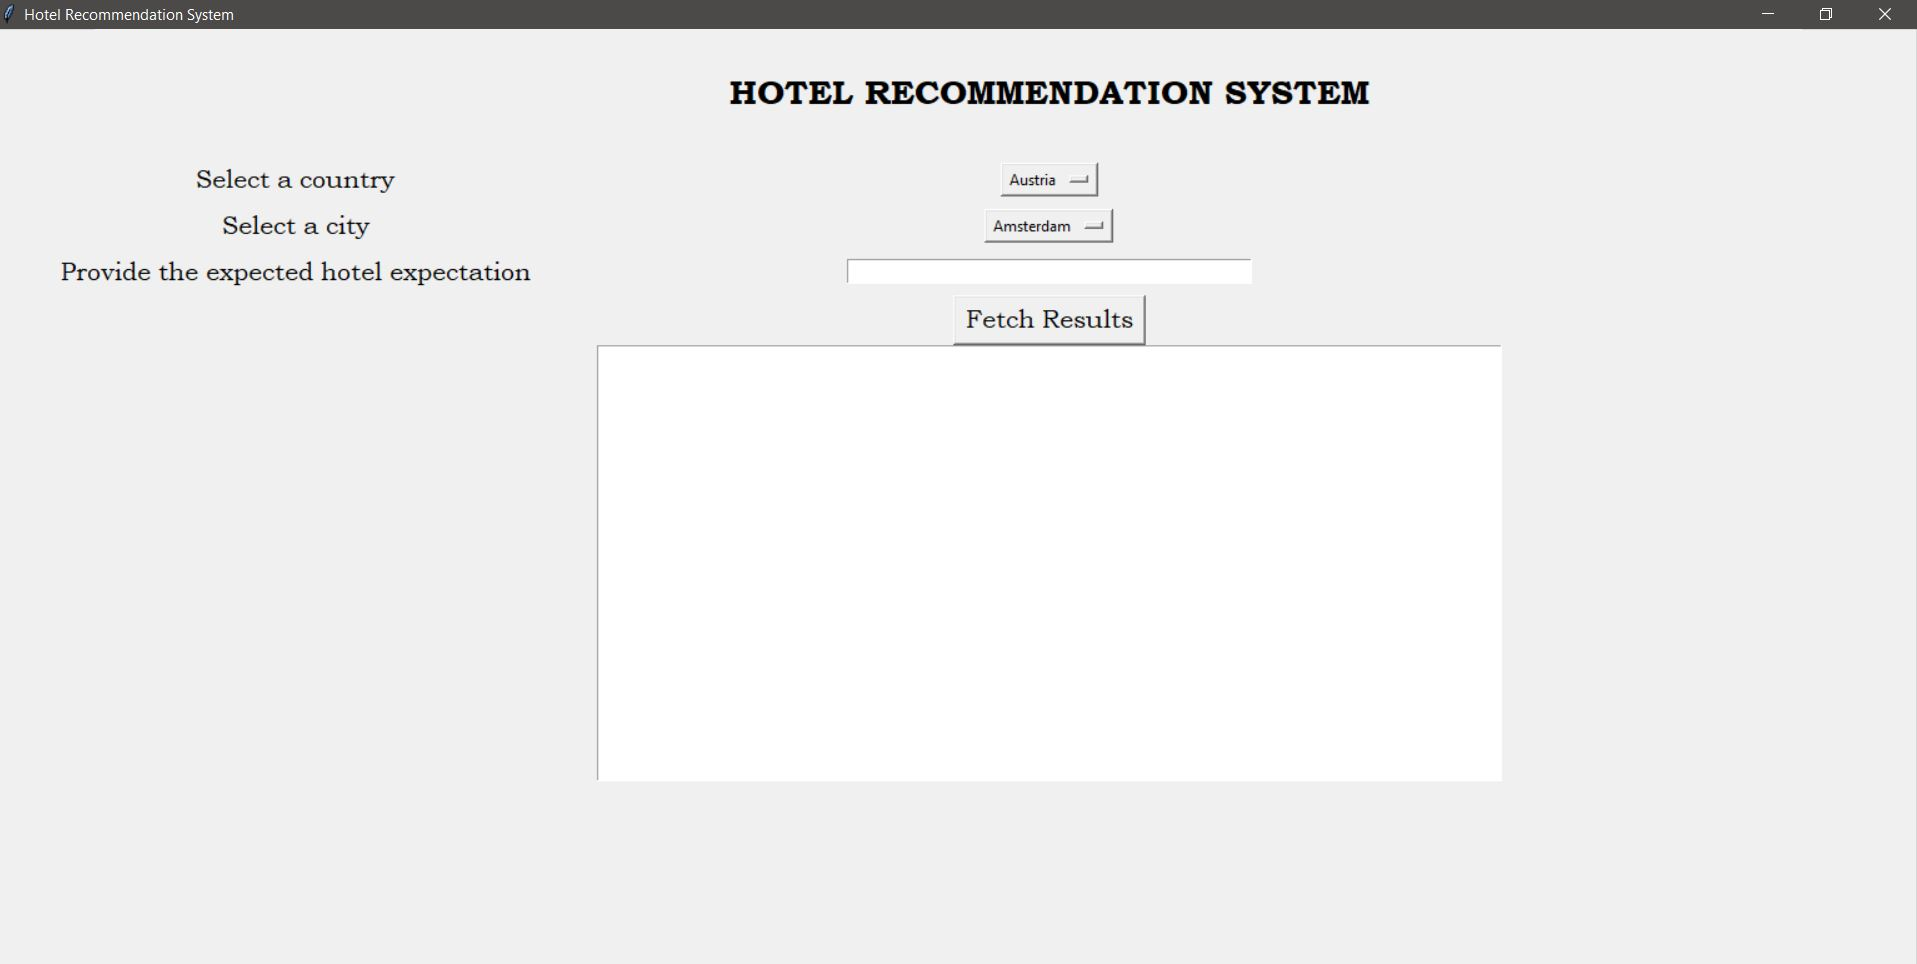

# When the selected city is not present in the selected country, We get the following output:-


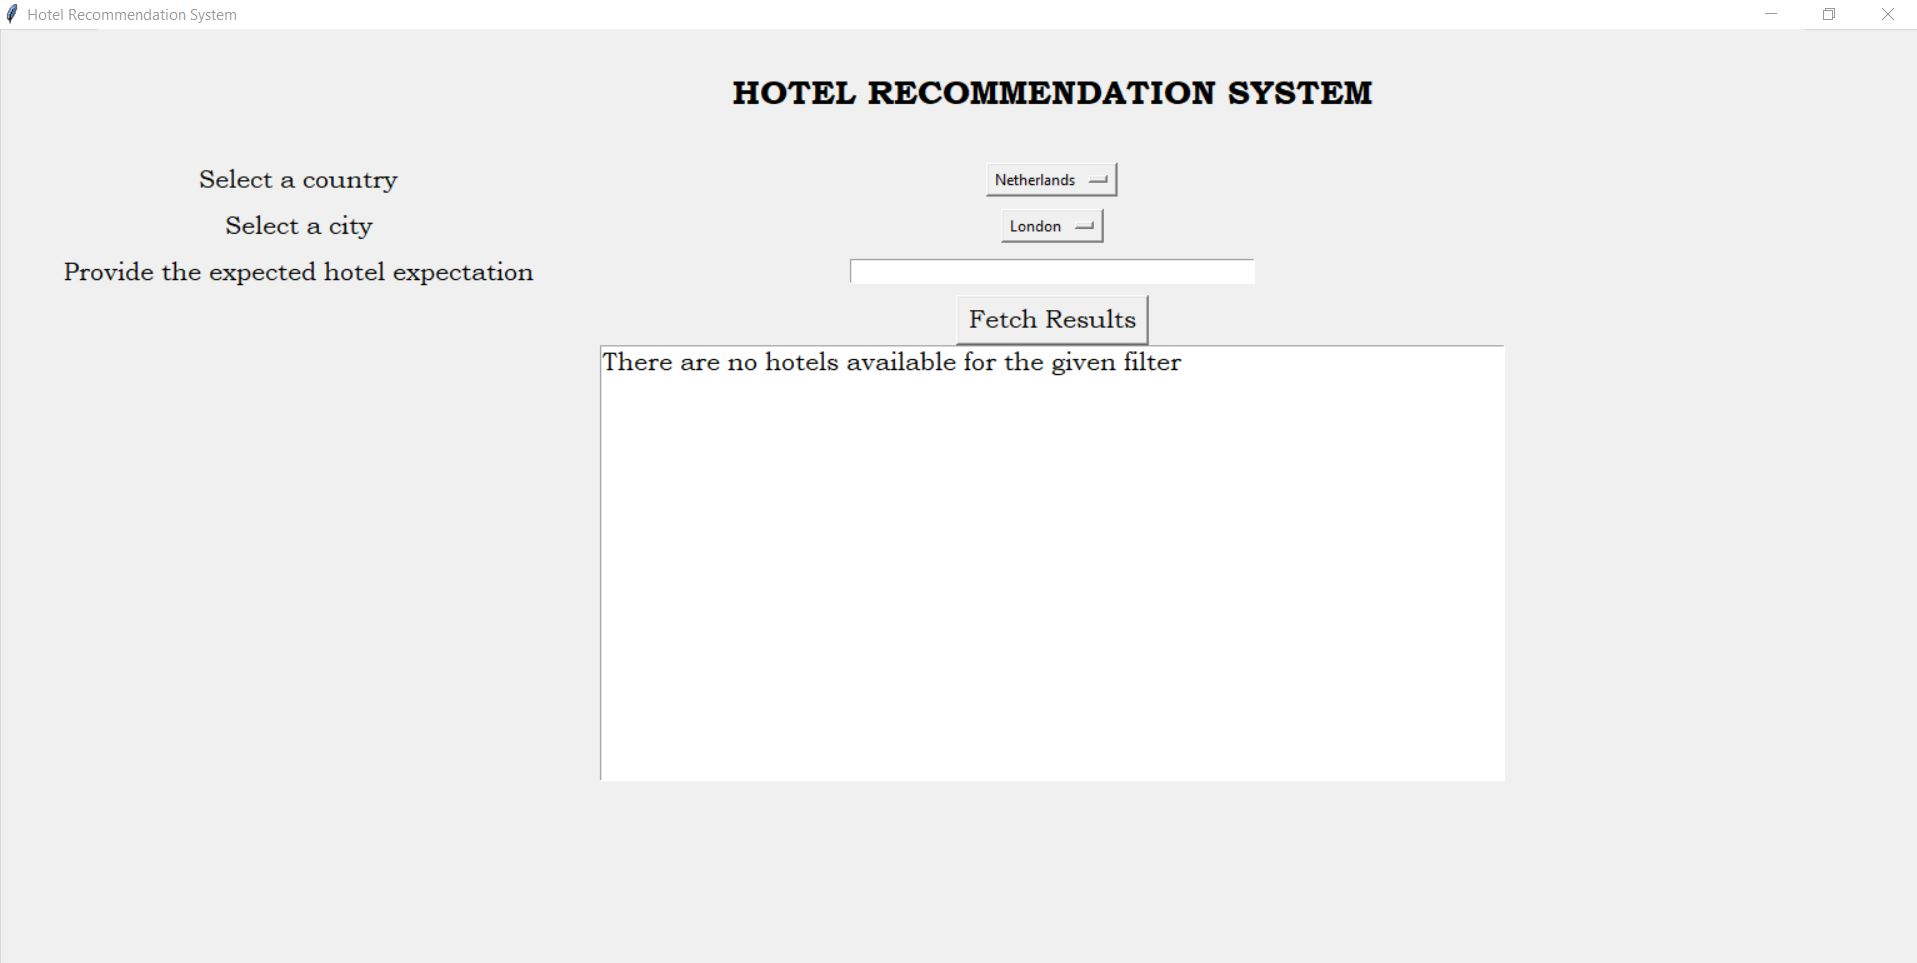

# When the appropriate city and filter is added, we get the following output:-

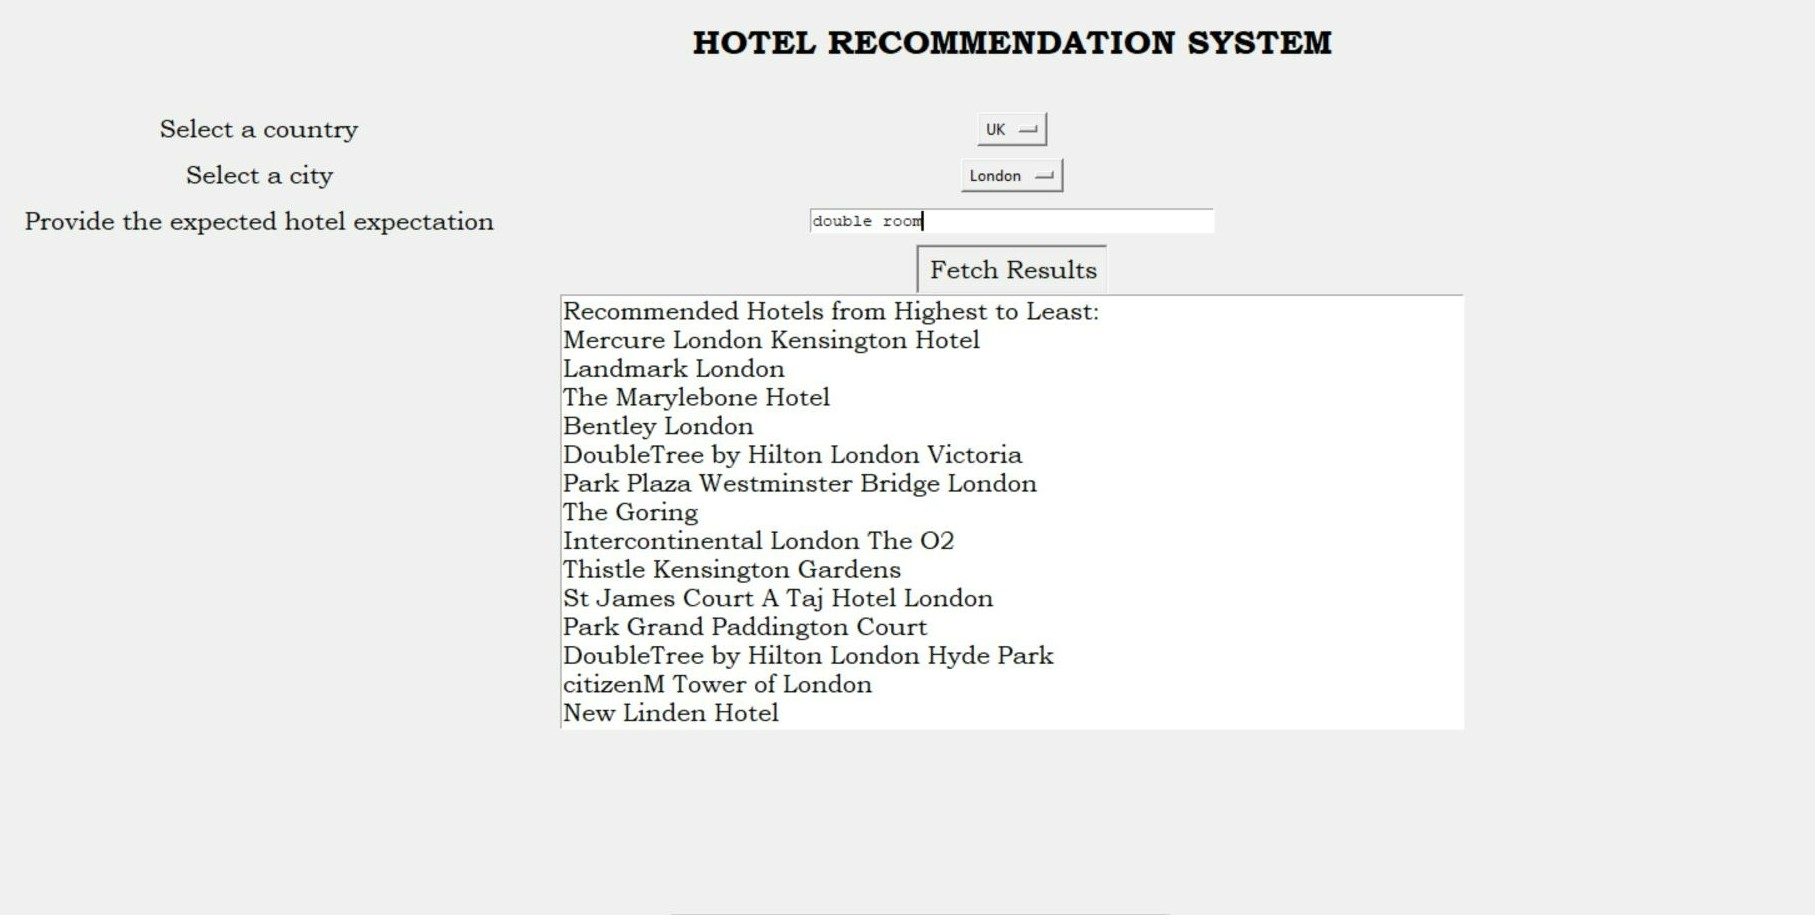
